In [1]:
# load packages
import numpy as np 
import scipy.io
from scipy.io   import  loadmat
import pandas as pd
import os
import matplotlib.pyplot as plt #import matplotlib as plt
from scipy.optimize import curve_fit 
import seaborn as sns #import mat73
import pickle as pkl
from datetime import datetime
from itertools import chain
from scipy.optimize import curve_fit
import scipy.optimize as opt

In [3]:
# Main Directory of processed file from MatLab
MainDir = 'C:\\plimon\\SSRP_analysis_branch\\Contrast_Response_Functions\\' # set dir - on my computer
os.chdir(MainDir) # change old dir, to this dir
d = os.listdir(MainDir) # list files in dir
print(f'Avilable Files to choose from: {len(d)}')
print(f'Files on hand: {d}')
##############################################
FileN_f1 = d[2] #  data    
print(FileN_f1) 
file_path1 = os.path.join(MainDir, FileN_f1) # join paths and prep 2 load
print( 'Group Imported:', file_path1.split('_')[-5], file_path1.split('_')[-4])
loadData = pkl.load(open(file_path1, 'rb'))
print('Keys Avilable:', loadData.keys())

Avilable Files to choose from: 4
Files on hand: ['SSRP_CntrlGroup_RCA1_CRF_20240627_150221.pkl', 'SSRP_CntrlGroup_RCA2_CRF_20240627_150307.pkl', 'SSRP_ExptGroup_RCA1_CRF_20240627_145808.pkl', 'SSRP_ExptGroup_RCA2_CRF_20240627_150025.pkl']
SSRP_ExptGroup_RCA1_CRF_20240627_145808.pkl
Group Imported: ExptGroup RCA1
Keys Avilable: dict_keys(['F1_Norm_CRF', 'F2_Norm_CRF', 'F1_Diffs', 'F2_Diffs', 'F1_CRF', 'F2_CRF', 'F1_Raw_Diffs', 'F2_Raw_Diffs', 'File_Location_Indicies', 'Subj_Num_Ids'])


In [4]:
Group = file_path1.split('_')[-5]
RCAComp = file_path1.split('_')[-4]
FileOutName = f'Subject_Saturationindex_{Group}_{RCAComp}_prepostCols_2F4F'
print(FileOutName)

Subject_Saturationindex_ExptGroup_RCA1_prepostCols_2F4F


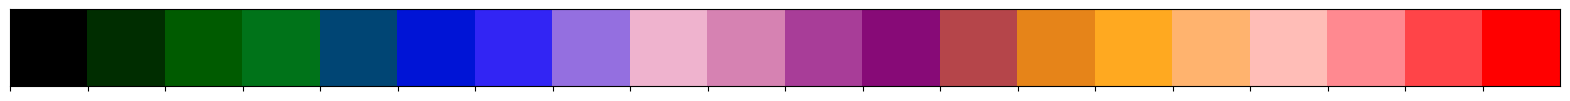

In [5]:
# Define the base colors for blending
base_colors = ['black','green', 'blue', 'pink' ,'purple', 'orange', 'pink','red']
# Number of colors needed in the spectrum
num_colors = 20
fill = sns.blend_palette(base_colors, n_colors=num_colors, as_cmap=False)
sns.palplot(fill)
plt.show()
color_set = [11,1,8,4]

contrast_labs = ['1%','3%','5%','16%','40%','100%']
contrast_levels = [1,3,5,16,40,100]
color_set = [3,6,12,13]

custom = {"axes.edgecolor": "black", "grid.linestyle": "dashed", "grid.color": "white"}
sns.set_style("darkgrid", rc = custom)

In [6]:
# subject names and arrays to index attnL and attnR expts
File_Pos = loadData['File_Location_Indicies']
Subj_Ids = loadData['Subj_Num_Ids']

In [7]:
## clean pre post CRF's
F1_Responses = loadData['F1_Norm_CRF']
F2_Responses = loadData['F2_Norm_CRF']
# post - pre crf response for normalized contrasts
F1_Diffs = loadData['F1_Diffs']
F2_Diffs = loadData['F2_Diffs']

In [8]:
#orignal contrast response functions 
F1_Responses_o = loadData['F1_CRF']
F2_Responses_o = loadData['F2_CRF']
# post-  pre / pre + post
F1_Diffs_o = loadData['F2_Raw_Diffs'] 
F2_Diffs_o = loadData['F1_Raw_Diffs']

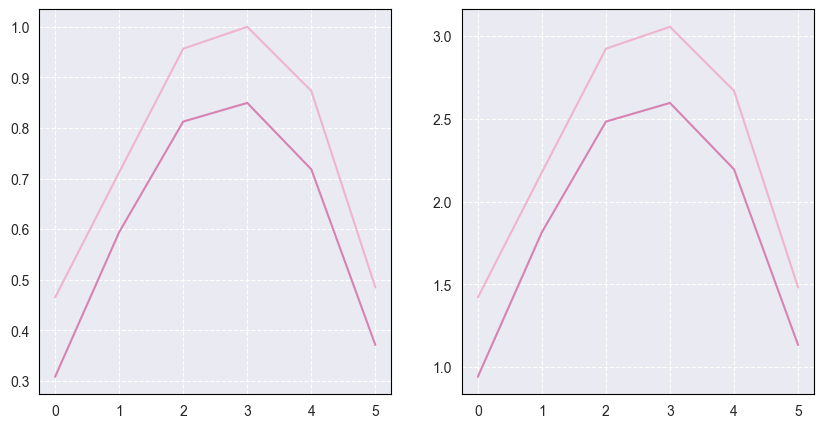

In [9]:
# n_crf = F1_Responses[31][0,:,:] # saturation 
# o_crf = F1_Responses_o[31][0,:,:]

n_crf = F1_Responses[31][0,:,:]
o_crf = F1_Responses_o[31][0,:,:]

labeltag = ['pre', 'post']

fig,axs = plt.subplots(1,2,figsize = ((10,5)))

for i in range(2):
    axs[0].plot(n_crf[i,:], color = fill[i^3+5], label = labeltag[i]) # normalized responses 
    axs[1].plot(o_crf[i,:], color = fill[i^3+5], label = labeltag[i]) # original responses

In [11]:
# def sigmoid(x, Rmax, c50, n):
#     """
#     Sigmoidal function for fitting CRF data with parameters:
#     Rmax - maximum response value
#     c50 - the half-maximal contrast value
#     n - the slope parameter (Hill coefficient)
#     """
#     return Rmax / (1 + (c50 / x)**n)
def sigmoid(c, rcmax, rmax, rc50, n):
    return rcmax + (rmax - rcmax) / (1 + (c / rc50)**n)
#  saturation index function
def Saturation_Index(RcMax, RC50, RMax): # compare 
    return (RcMax - RC50) / RMax

data = F2_Responses[0][0,0,:]
pops, _ = curve_fit(sigmoid, contrast_levels, data)
print(pops)
x_fit = np.linspace(min(contrast_levels), max(contrast_levels), 100)
y_fit = sigmoid(x_fit, rcmax= pops[0] ,rmax= pops[1], rc50= pops[2], n = pops[3])
plt.plot(x_fit, y_fit, label='Fitted Sigmoid Curve', color='blue')
# Plot the original data points
plt.plot(contrast_levels, data, marker='o', linestyle='', label='Original Data', color='black')

Satruration_val = Saturation_Index(RcMax = pops[1], RC50 = pops[2], RMax = pops[3])
print(Satruration_val*100)

In [ ]:

Satruration_val = Saturation_Index(RcMax = pops[1], RC50 = pops[2], RMax = pops[3])
print(Satruration_val)

In [ ]:

Satruration_val = Saturation_Index(RcMax = pops[1], RC50 = pops[2], RMax = pops[3])
print(Satruration_val)